# Problem 1

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [20]:
# The function will return a glider turned randomly
def get_glider():
    glider = np.asarray([[0,1,0],[1,0,0],[1,1,1]])
    for r in range(random.randint(0,3)):
        glider = np.rot90(glider)
        
    if random.randint(0,1):
        glider = np.transpose(glider)
    return glider

get_glider()

array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 1]])

In [25]:
side = 100
matrix = np.zeros([side+2,side+2])
for g in range(20):
    x = random.randint(1,side+2-3) # side + 2 -- size, -3 glider size
    y = random.randint(1,side+2-3)
    while matrix[x:x+3,y:y+3].sum() > 0:
        x = random.randint(1,side+2-3) # side + 2 -- size, -3 glider size
        y = random.randint(1,side+2-3)
    matrix[x:x+3,y:y+3] = get_glider()

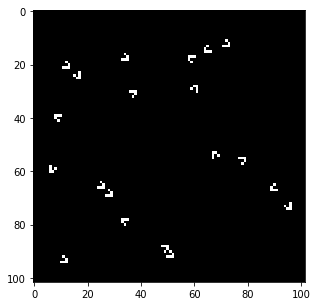

In [29]:
fig = plt.figure(figsize = (5,5))
im = plt.imshow(matrix, cmap = plt.cm.gray)
plt.show()

In [30]:
def update(frame):
    global matrix
    global im
    N = matrix[:-2,1:-1]+matrix[2:,1:-1]+matrix[1:-1,2:]+matrix[1:-1,:-2]+matrix[:-2,:-2]+matrix[2:,:-2]+matrix[2:,2:]+matrix[:-2,2:]
    kill_cells = (N < 2) | (N > 3)
    resurrect_cells = N == 3
    cells = matrix[1:-1,1:-1]
    cells[kill_cells] = 0
    cells[resurrect_cells] = 1
    im.set_data(cells)
    
from matplotlib.animation import FuncAnimation

anim = FuncAnimation(fig, update, interval = 10, frames = 30)
anim.save('gliders.mp4', fps = 30)

import io
import base64
from IPython.display import HTML

video = io.open('gliders.mp4','r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''.format(encoded.decode('ascii')))

# Problem 3

In [32]:
arr = np.load('./hurr_data_full.npy')
arr.shape

(16103, 6)

In [40]:
direction = np.arctan2(arr[:,3],arr[:,2])
direction/np.pi*180

array([  69.44401466,   71.56497832,   66.80146601, ...,  119.74484767,
        112.38014798,   92.72626649])

# Extra credit

The idea here is to rotate model errors (arr[:,4:6]) by hurricane direction. The result is the new coordinate system aligned with the direction of the hurricane.

Practically, this is achieved by translating model errors to complex plane:

$error = error_{lat}*J+error_{lon}$

Then turning them by direction $\phi$

$error_{aligned} = error * e^{J*\phi}$

$error_{across} = error_{aligned}.real$

$error_{along} = error_{aligned}.imag$


In [41]:
error = arr[:,4]*1.j+arr[:,5]
aligned_error = error*np.exp(direction*1.j)

In [44]:
along_track = aligned_error.imag
across_track = aligned_error.real
along_track,across_track

(array([ 1.57981165,  0.83436341,  0.60304649, ..., -0.48484654,
         0.402468  ,  0.40930231]),
 array([ 0.50770162,  0.52624281,  0.50913893, ...,  1.93446691,
         1.66675647,  0.98777192]))

# Quiz 3

In [ ]:
[[ 0.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  0.]
 [ 0.  4.  5.  6.  0.]
 [ 0.  0.  0.  0.  0.]]

In [15]:
import numpy as np

arr = np.zeros([4,5])
arr1 = np.arange(1,7).reshape([2,3])
arr[1:-1,1:-1] = arr1
arr

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  2.,  3.,  0.],
       [ 0.,  4.,  5.,  6.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])